# Extracting data from open source scientific websites

There are several free data repositories where some authors host documents and data to make their results reproducible. Here we will explore 3 of them (Zenodo, , , ) and we will use several ways to download information automatically.

In [2]:
import pandas as pd
import numpy as np

## Reading data from external sources
Data can be readed from different sources and there are not specific rules. The better way to read it usually depends on the size of the data and where it is allocated.

If the file is easily downloadable and of small size, the most normal thing to do is to download it and add it to a data folder:

- Project_folder/
    - a_notebook.ipynb
    - data/
            your_data.txt
 
However, to avoid repetition, or possibly to keep track of file changes, it is possible to download directly to the ram in several ways.

## Loading csv, excel, hdf, ... directly to the ram with pandas
Small files can be charged into a pandas dataframe just with a URL direction using pandas as follows

In [3]:
# url direction
url_excel = "https://zenodo.org/record/4446840/files/Figure2a.xlsx"
df = pd.read_excel(url_excel)
df

,G/kappa_a,g/kappa_a,E_N
0,0.000,0.00,0.000000
1,0.000,0.03,0.000000
2,0.000,0.06,0.000000
3,0.000,0.09,0.000000
4,0.000,0.12,0.000000
...,...,...,...
1151,0.495,0.87,1.051114
1152,0.495,0.90,1.081211
1153,0.495,0.93,1.110047
1154,0.495,0.96,1.137653


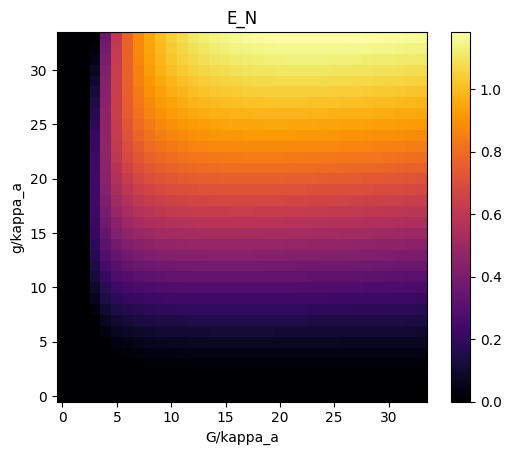

In [4]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

# Convert the data to a 2D array
Y = "g/kappa_a"
X = "G/kappa_a"
Z = "E_N"
data_array = df.pivot(index=Y, columns=X, values=Z).values

# Define the X and Y axis coordinates
x_coords = np.linspace(df[X].min(), df[X].max(), len(df[X]))
y_coords = np.linspace(df[Y].min(), df[Y].max(), len(df[Y]))

# Create a figure and subplot
fig, ax = plt.subplots()

# Plot the image
image = ax.imshow(data_array, cmap="inferno", origin="lower")

# Add a colorbar for the intensity scale
cbar = ax.figure.colorbar(image, ax=ax)

# Set the axis labels and title
ax.set_title(Z)
ax.set_xlabel(X)
ax.set_ylabel(Y)

# Show the plot
plt.show()

In [5]:
%load_ext watermark
%watermark -v -m -p pandas
# v: Python version, -m: Machine specifications, -p <package>: package version

Python implementation: CPython
Python version       : 3.8.16
IPython version      : 8.11.0

pandas: 1.5.3

Compiler    : GCC 11.2.0
OS          : Linux
Release     : 5.15.0-56-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 8
Architecture: 64bit



## Using wget 

## Using black
Now here is an example on how to use black to format things:

In [3]:
# This is an comment example, we will see if black modifies it
my_dictionary = {
    "apple": {"color": "red", "taste": "sweet", "price": 0.75},
    "banana": {"color": "yellow", "taste": "sweet", "price": 0.25},
    "orange": {"color": "orange", "taste": "sour", "price": 0.50},  # A comment heeere
    "kiwi": {"color": "brown", "taste": "tart", "price": 1.00},
    "grape": {"color": "purple", "taste": "sweet", "price": 0.10},
}


def add_binary(a, b):  # a comment here
    """
    Returns the sum of two decimal numbers in binary digits.

            Parameters:
                    a (int): A decimal integer
                    b (int): Another decimal integer

            Returns:
                    binary_sum (str): Binary string of the sum of a and b
    """
    binary_sum = bin(a + b)[2:]
    return binary_sum

## Read Protein Sequence and Secondary Structure Data
Secondary structure of proteins is most commonly assigned with the DSSP method.

Kabsch W, Sander C (1983) Dictionary of protein secondary structure: Pattern recognition of hydrogen‐bonded and geometrical features. Biopolymers 22, 2577–637. [doi 0.1002/bip.360221211](https://doi.org/10.1002/bip.360221211)

DSSP defines [8 classes of secondary structure](https://en.wikipedia.org/wiki/Protein_secondary_structure):

| DSSP Class  | Code |
| :---        | ---: |
| 4-turn helix (&#945; helix), min. length 4 residues | H |
| Isolated &#946;-bridge (single pair &#946;-sheet hydrogen bond formation) | B |
| Extended strand in parallel or anti-parallel &#946;-sheet conformation, min length 2 residues | E |
| 3-turn helix (3<sub>10</sub> helix), min. length 3 residues | G |
| 5-turn helix (&#960; helix), min. length 5 residues | I |
| Hydrogen bonded turn (3, 4 or 5 turn) | T |
| Bend (the only non-hydrogen-bond based assignment) | S |
| Coil (residues which are not in any of the above conformations) | C |

The [RCSB Protein Data Bank](https://www.rcsb.org) provides protein sequences and DSSP secondary structure assignments. The method below reads a local copy of this file and returns the data as a Pandas dataframe. 

The **secondary_structure** string below is the secondary structure assignment for each amino acid residue in the **sequence**.

In [4]:
sec_struct = pdbutils.read_secondary_structure("./data/ss_dis.txt.gz")
print("Number of protein chains in PDB:", sec_struct.shape[0], "\n")
sec_struct.head()

Number of protein chains in PDB: 402007 



,pdbChainId,secondary_structure,sequence
0,101M.A,CCCCHHHHHHHHHHHHHHGGGHHHHHHHHHHHHHHHCGGGGGGCTT...,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...
1,102L.A,CCHHHHHHHHHCCEEEEEECTTSCEEEETTEEEESSSCTTTHHHHH...,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAAKSE...
2,102M.A,CCCCHHHHHHHHHHHHHHGGGHHHHHHHHHHHHHHHCGGGGGGCTT...,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...
3,103L.A,CCHHHHHHHHHCCEEEEEECTTSCEEEETTEECCCCCCCCCHHHHH...,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNSLDAAK...
4,103M.A,CCCCHHHHHHHHHHHHHHGGGHHHHHHHHHHHHHHHCGGGGGGCTT...,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...


## Find the Intersection between the two Datasets
Note the high level of redundancy in the PDB: the representative set contains about 14,000 protein chains, whereas the entire PDB contains more than 400,000 protein chains.

By merging the representative set of protein chains with the secondary structure dataset we obtain the intersection between the two sets. Both datasets contain a unique identifier column **pdbChainId** that is used to join the datasets.

In [5]:
df = sec_struct.merge(
    representatives, left_on="pdbChainId", right_on="pdbChainId", how="inner"
)
print("Number of representative chains with secondary structure data:", df.shape[0])
df.head()

Number of representative chains with secondary structure data: 13791


,pdbChainId,secondary_structure,sequence,length,Exptl.,resolution,R-factor,FreeRvalue
0,12AS.A,CCCCHHHHHHHHHHHHHHHHHHHHHHHCEEECCCCSEEETTSSCSC...,MKTAYIAKQRQISFVKSHFSRQLEERLGLIEVQAPILSRVGDGTQD...,330,XRAY,2.2,0.16,0.29
1,16VP.A,CCSCCCCCCCCHHHHHHHHHHHHTCTTHHHHHHHHHHCCCCCSTTS...,SRMPSPPMPVPPAALFNRLLDDLGFSAGPALCTMLDTWNEDLFSAL...,366,XRAY,2.1,0.19,0.26
2,1A0I.A,CTTCCCCEEEEECCHHHHHHHHHHHSSEEEEECCCSEEEEEEEETT...,VNIKTNPFKAVSFVESAIKKALDNAGYLIAEIKYDGVRGNICVDNT...,348,XRAY,2.6,0.22,0.34
3,1A12.C,CCCCCCCCCCCCCCCCCCCTTCCCCCBEEEEEEECTTSTTCSCTTC...,RRSPPADAIPKSKKVKVSHRSHSTEPGLVLTLGQGDVGQLGLGENV...,413,XRAY,1.7,0.19,0.22
4,1A1X.A,CCCCCCCCCCCSEEEEEETTEEEETTSCEEEEEEEECSSCEEEEEE...,GSAGEDVGAPPDHLWVHQEGIYRDEYQRTWVAVVEEETSFLRARVQ...,108,XRAY,2.0,0.21,0.25


## Calculate Secondary Structure Content
To reduce the DSSP 8-state classification to a 3-state classification we group related secondary structure elements: alpha (I, H, G), beta (E, B), and coil (S, T, C). Then we calculate the fraction of the amino acid residues in each of the three classes.

In [6]:
def alpha_fraction(s):
    return (s.count("I") + s.count("H") + s.count("G")) / len(s)


def beta_fraction(s):
    return (s.count("E") + s.count("B")) / len(s)


def coil_fraction(s):
    return (s.count("S") + s.count("T") + s.count("C")) / len(s)


df["alpha"] = df.secondary_structure.apply(alpha_fraction)
df["beta"] = df.secondary_structure.apply(beta_fraction)
df["coil"] = df.secondary_structure.apply(coil_fraction)

df.head()

,pdbChainId,secondary_structure,sequence,length,Exptl.,resolution,R-factor,FreeRvalue,alpha,beta,coil
0,12AS.A,CCCCHHHHHHHHHHHHHHHHHHHHHHHCEEECCCCSEEETTSSCSC...,MKTAYIAKQRQISFVKSHFSRQLEERLGLIEVQAPILSRVGDGTQD...,330,XRAY,2.2,0.16,0.29,0.345455,0.206061,0.448485
1,16VP.A,CCSCCCCCCCCHHHHHHHHHHHHTCTTHHHHHHHHHHCCCCCSTTS...,SRMPSPPMPVPPAALFNRLLDDLGFSAGPALCTMLDTWNEDLFSAL...,366,XRAY,2.1,0.19,0.26,0.469945,0.046448,0.483607
2,1A0I.A,CTTCCCCEEEEECCHHHHHHHHHHHSSEEEEECCCSEEEEEEEETT...,VNIKTNPFKAVSFVESAIKKALDNAGYLIAEIKYDGVRGNICVDNT...,348,XRAY,2.6,0.22,0.34,0.232759,0.318966,0.448276
3,1A12.C,CCCCCCCCCCCCCCCCCCCTTCCCCCBEEEEEEECTTSTTCSCTTC...,RRSPPADAIPKSKKVKVSHRSHSTEPGLVLTLGQGDVGQLGLGENV...,413,XRAY,1.7,0.19,0.22,0.038741,0.418886,0.542373
4,1A1X.A,CCCCCCCCCCCSEEEEEETTEEEETTSCEEEEEEEECSSCEEEEEE...,GSAGEDVGAPPDHLWVHQEGIYRDEYQRTWVAVVEEETSFLRARVQ...,108,XRAY,2.0,0.21,0.25,0.037037,0.472222,0.490741


## Classify Sequences by Secondary Structure Content
Next we classify each protein chain into one of four classes. We use a threshold of 25% to define a predominant class.

* alpha: predominantly alpha (> 25%)
* beta: predominantly beta (> 25%)
* alpha+beta: significant alpha (> 25%) and beta (> 25%)
* other: cases that do not fit into the 3 classes above 

Protein chains in the **other** class will be ignored in the subsequent analysis.

In [7]:
def protein_fold_class(data, min_threshold, max_threshold):
    """
    Returns fold classification:
    "alpha", "beta", "alpha+beta", and "other" based upon the
    fraction of alpha and beta.
    """
    if data.alpha > max_threshold and data.beta < min_threshold:
        return "alpha"
    elif data.beta > max_threshold and data.alpha < min_threshold:
        return "beta"
    elif data.alpha > max_threshold and data.beta > max_threshold:
        return "alpha+beta"
    else:
        return "other"

In [8]:
# assign protein fold class
df[value_col] = df.apply(
    protein_fold_class, min_threshold=0.05, max_threshold=0.25, axis=1
)

# exclude protein chains without a dominant classification from further analysis.
df = df[df[value_col] != "other"]

print("Dataset size", df.shape[0])
df.head()

Dataset size 5370


,pdbChainId,secondary_structure,sequence,length,Exptl.,resolution,R-factor,FreeRvalue,alpha,beta,coil,foldClass
1,16VP.A,CCSCCCCCCCCHHHHHHHHHHHHTCTTHHHHHHHHHHCCCCCSTTS...,SRMPSPPMPVPPAALFNRLLDDLGFSAGPALCTMLDTWNEDLFSAL...,366,XRAY,2.10,0.19,0.26,0.469945,0.046448,0.483607,alpha
3,1A12.C,CCCCCCCCCCCCCCCCCCCTTCCCCCBEEEEEEECTTSTTCSCTTC...,RRSPPADAIPKSKKVKVSHRSHSTEPGLVLTLGQGDVGQLGLGENV...,413,XRAY,1.70,0.19,0.22,0.038741,0.418886,0.542373,beta
4,1A1X.A,CCCCCCCCCCCSEEEEEETTEEEETTSCEEEEEEEECSSCEEEEEE...,GSAGEDVGAPPDHLWVHQEGIYRDEYQRTWVAVVEEETSFLRARVQ...,108,XRAY,2.00,0.21,0.25,0.037037,0.472222,0.490741,beta
5,1A2X.B,CCCCHHHHHHHHHHHHHHHHHHHHHHHHHHHTCCCCCCCCCCCCCCC,GDEEKRNRAITARRQHLKSVMLQIAATELEKEEGRREAEKQNYLAEH,47,XRAY,2.30,0.22,0.33,0.574468,0.000000,0.425532,alpha
8,1A62.A,CBHHHHHTSCHHHHHHHHHTTTCCCCTTSCHHHHHHHHHHHHHHTT...,MNLTELKNTPVSELITLGENMGLENLARMRKQDIIFAILKQHAKSG...,130,XRAY,1.55,0.22,0.25,0.284615,0.261538,0.453846,alpha+beta


## Save Dataset
We save the representative dataset with protein sequence and fold classification as a Pandas dataframe for further analysis.

In [9]:
df.to_json("./intermediate_data/foldClassification.json")

## Next step
After you saved the dataset here, run the next step in the workflow [2-CalculateFeatures.ipynb](./2-CalculateFeatures.ipynb) or go back to [0-Workflow.ipynb](./0-Workflow.ipynb).

---

**Authors:** [Peter W. Rose](mailto:pwrose.ucsd@gmail.com), Shih-Cheng Huang, UC San Diego, October 1, 2018

---